# Naver Webtoon
https://www.kaggle.com/datasets/bmofinnjake/naverwebtoon-datakorean

설명: 네이버 웹툰과 네이버 베스트 도전 웹툰에 대한 정보가 포함된 데이터셋으로, 웹툰의 연재 상태, 장르, 평점 등을 바탕으로 웹툰의 인기도 및 성과를 분석할 수 있습니다.

데이터셋: naver.csv, naver_challenge.csv

### `naver.csv` (네이버 웹툰 데이터)

1. **id**: 웹툰의 고유 ID
2. **title**: 웹툰 제목
3. **author**: 작가
4. **genre**: 장르
5. **description**: 웹툰 소개
6. **rating**: 웹툰의 평균 평점 (10점 만점)
7. **date**: 웹툰의 최신 업데이트 날짜
8. **completed**: 연재 완료 여부
9. **age**: 추천 연령
10. **free**: "기다리면 무료" 이벤트 가능 여부
11. **link**: 웹툰 링크

### `naver_challenge.csv` (네이버 베스트 도전 웹툰 데이터)

1. **id**: 웹툰의 고유 ID
2. **title**: 웹툰 제목
3. **author**: 작가 (마지막 문자열은 생략)
4. **summary**: 웹툰 요약
5. **rating**: 웹툰의 평점
6. **genre**: 장르
7. **format**: 웹툰 형식
8. **description**: 웹툰 설명
9. **serial**: 네이버 정식 연재 여부
10. **potenup**: 포텐업 선정 여부

### **`naver.csv` 가설 3개**

1. 가설: 연재 완료 여부(`completed`)가 웹툰의 평점(`rating`)에 영향을 줄 것이다.
    
    설명: 연재가 완료된 웹툰이 완료되지 않은 웹툰에 비해 더 높은 평점을 받을 것이다.
    
2. 가설: 장르(`genre`)가 평점(`rating`)에 영향을 줄 것이다.
    
    설명: 특정 장르(예: 로맨스, 드라마)가 다른 장르에 비해 평균적으로 더 높은 평점을 받을 것이다.
    
3. 가설: 연령 제한(`age`)이 기다리면 무료 여부(`free`)에 영향을 줄 것이다.
    
    설명: 낮은 연령층을 타겟으로 한 웹툰일수록 기다리면 무료 이벤트가 적용될 확률이 높을 것이다.

### **`naver_challenge.csv` 가설 3개**

1. 가설: 포텐업 선정 여부(`potenup`)가 평점(`rating`)에 영향을 줄 것이다.
    
    설명: 포텐업에 선정된 웹툰이 선정되지 않은 웹툰에 비해 더 높은 평점을 받을 것이다.
    
2. 가설: 장르(`genre`)가 정식 연재 여부(`serial`)에 영향을 줄 것이다.
    
    설명: 특정 장르(예: 판타지, 드라마)가 다른 장르보다 정식 연재될 확률이 높을 것이다.
    
3. 가설: 형식(`format`)이 정식 연재 여부(`serial`)에 영향을 줄 것이다.
    
    설명: 웹툰 형식(예: 단편, 장편)이 정식 연재로 이어질 가능성에 차이가 있을 것이다.

### **두 데이터셋을 병합해야 검증 가능한 가설 1개**

1. **타겟 변수: `rating` (평점)**가설: 베스트 도전 웹툰의 평점(`naver_challenge.csv`)과 정식 연재 후 평점(`naver.csv`)이 변화할 것이다.

설명: 베스트 도전에서 정식 연재로 이어진 웹툰들은 정식 연재 이후 더 높은 평점을 받을 가능성이 있을 것이다.

In [1]:
# 운영 체제마다 한글이 보이게 하는 설정
# 윈도우
import platform
import matplotlib
from matplotlib import font_manager, rc

# '-' 기호 보이게 하기
matplotlib.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = "C:\\Windows\\Fonts\\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic

import scipy.stats as spst

In [3]:
naver = pd.read_csv('./naver.csv')

In [4]:
naver.head()

,id,title,author,genre,description,rating,date,completed,age,free,link
0,756056,가난을 등에 업은 소녀,B급달궁 / 오은지,"스토리, 로맨스",흔하디 흔한 재벌후계자와 캔디도 울고 갈 박복한 가난소녀의 파란만장 동거기!인기작 ...,9.13,2020.10.19 00:00,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=7...
1,670144,가담항설,랑또,"스토리, 판타지",이번 주인공은 돌이다!돌이지만 동료도 모으고 악당도 물리친다!랑또 작가표 동양 판타...,9.98,2020.10.07 23:00,True,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...
2,732071,가령의 정체불명 이야기,가령,"옴니버스, 드라마",어느 날... 인어가 내게 말을 걸어왔다. 눈을 떠보니 총구가 있었다. 그리고 몸이...,9.95,2020.02.03 23:22,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=7...
3,703844,가비지타임,2사장,"스토리, 스포츠","한국 최초 한국형 고교스포츠 웹툰!열혈따윈 개나 줘, 낙오자들 뿐인 농구부의 운명은?",9.96,2022.12.24 22:57,False,전체연령가,False,https://comic.naver.com/webtoon/list?titleId=7...
4,785701,가상&RPG,주다현,"스토리, 판타지","""사람은 좀 죽여도 싸우는건 싫어해요."" 게임에서조차 집 바깥을 나가지 않는 '제리...",9.91,2022.10.19 23:00,False,12세 이용가,False,https://comic.naver.com/webtoon/list?titleId=7...


## naver 데이터셋 정보 확인

In [5]:
naver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2100 non-null   int64  
 1   title        2100 non-null   object 
 2   author       2100 non-null   object 
 3   genre        2100 non-null   object 
 4   description  2100 non-null   object 
 5   rating       2100 non-null   float64
 6   date         2100 non-null   object 
 7   completed    2100 non-null   bool   
 8   age          1998 non-null   object 
 9   free         2100 non-null   bool   
 10  link         2100 non-null   object 
dtypes: bool(2), float64(1), int64(1), object(7)
memory usage: 151.9+ KB


In [6]:
naver[['rating']].describe().T

,count,mean,std,min,25%,50%,75%,max
rating,2100.0,9.736071,0.559215,3.81,9.77,9.9,9.95,9.99


In [7]:
naver.isna().sum()

id               0
title            0
author           0
genre            0
description      0
rating           0
date             0
completed        0
age            102
free             0
link             0
dtype: int64

**결측치 처리**

연령제한이 독립변수로 작용을 하는 가설3에서는 결측치가 있는 행을 제거시키자.

임의로 다른 값으로 채울 수 없다고 판단됨.

,count,mean,std,min,25%,50%,75%,max
rating,2100.0,9.736071,0.559215,3.81,9.77,9.9,9.95,9.99


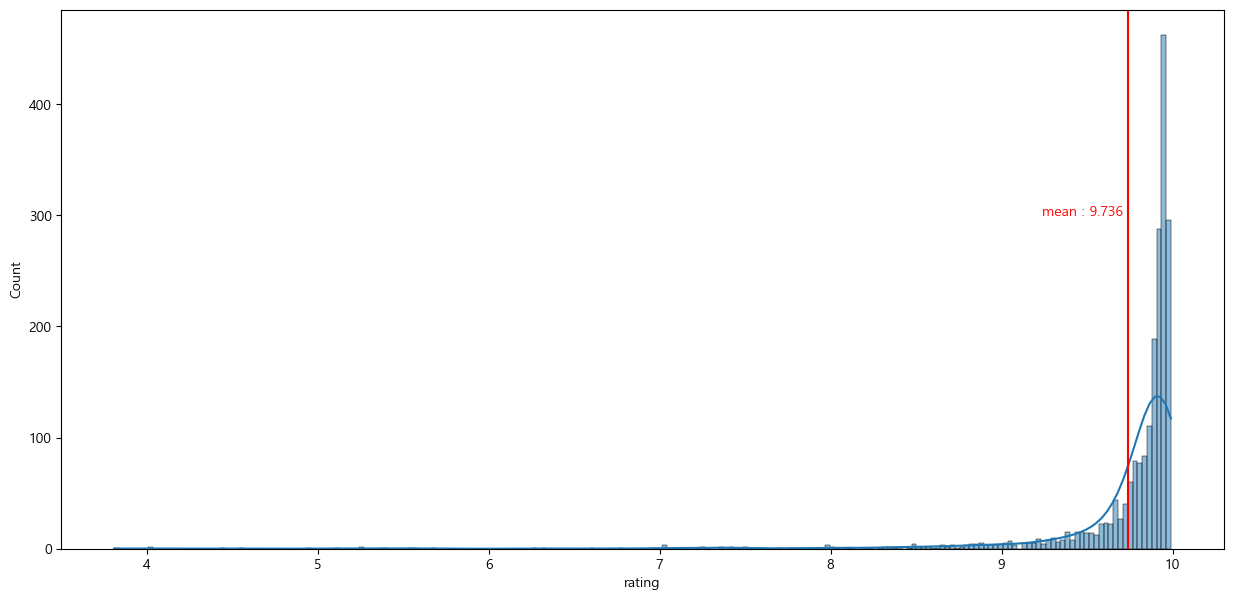

In [8]:
# rating 시각화
display(naver[['rating']].describe().T)
plt.figure(figsize=(15,7))
sns.histplot(naver['rating'], kde=True)
plt.axvline(naver['rating'].mean(), color='red')
plt.text(np.mean(naver['rating'])-0.5, 300, f'mean : {round(np.mean(naver['rating']),3)}', color = 'r')
plt.show()

---
## 가설1 : 연재 완료 여부(completed)가 웹툰의 평점(rating)에 영향을 줄 것이다.

### 설명: 연재가 완료된 웹툰이 완료되지 않은 웹툰에 비해 더 높은 평점을 받을 것이다.
=> **관련있다**

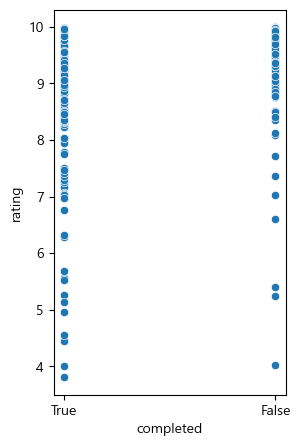

In [9]:
plt.figure(figsize=(3,5))
sns.scatterplot(x=naver['completed'].astype(str), y=naver['rating'])
plt.show()

In [10]:
# completed 값의 개수와 비율 확인
print(naver['completed'].value_counts())
print(naver['completed'].value_counts(normalize=True))

completed
True     1406
False     694
Name: count, dtype: int64
completed
True     0.669524
False    0.330476
Name: proportion, dtype: float64


In [11]:
# completed별 rating의 평균 확인
comp_grp = naver.groupby('completed', as_index=False)['rating'].mean()
comp_grp

,completed,rating
0,False,9.791182
1,True,9.708869


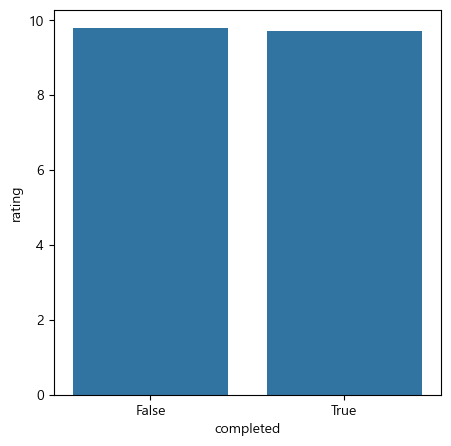

In [12]:
plt.figure(figsize=(5,5))
sns.barplot(x=comp_grp['completed'], y=comp_grp['rating'])
plt.show()

In [13]:
# 두 그룹으로 데이터 저장
no_comp = naver.loc[naver['completed']==False, 'rating']
comp = naver.loc[naver['completed']==True, 'rating']

In [14]:
# t-test
spst.ttest_ind(no_comp, comp)

TtestResult(statistic=3.179727704622156, pvalue=0.0014956384389568497, df=2098.0)

**t-test 결과, t통계량이 2보다큰 3.1이고 pvalue의 값이 0.05보다 작은 0.001이기 때문에 연재완료 여부별 평점이 차이가 있다.**

---
## 가설2: 장르(genre)가 평점(rating)에 영향을 줄 것이다.

### 설명: 특정 장르(예: 로맨스, 드라마)가 다른 장르에 비해 평균적으로 더 높은 평점을 받을 것이다.
=> **관련있다**

In [15]:
# genre 값의 개수와 비율 확인
print(naver['genre'].value_counts())
print(naver['genre'].value_counts(normalize=True))

genre
스토리, 로맨스       522
스토리, 드라마       373
스토리, 판타지       341
스토리, 스릴러       220
스토리, 액션        168
스토리, 개그         69
에피소드, 일상        56
에피소드, 개그        51
스토리, 무협/사극      40
에피소드, 드라마       36
옴니버스, 스릴러       30
옴니버스, 드라마       29
에피소드, 로맨스       20
스토리, 스포츠        20
스토리, 감성         19
옴니버스, 개그        18
옴니버스, 일상        16
옴니버스, 판타지       14
에피소드, 감성        13
에피소드, 스릴러        9
에피소드, 액션         9
스토리, 일상          8
에피소드, 판타지        7
옴니버스, 로맨스        5
에피소드, 무협/사극      2
에피소드, 스포츠        2
옴니버스, 무협/사극      1
옴니버스, 감성         1
옴니버스, 스포츠        1
Name: count, dtype: int64
genre
스토리, 로맨스       0.248571
스토리, 드라마       0.177619
스토리, 판타지       0.162381
스토리, 스릴러       0.104762
스토리, 액션        0.080000
스토리, 개그        0.032857
에피소드, 일상       0.026667
에피소드, 개그       0.024286
스토리, 무협/사극     0.019048
에피소드, 드라마      0.017143
옴니버스, 스릴러      0.014286
옴니버스, 드라마      0.013810
에피소드, 로맨스      0.009524
스토리, 스포츠       0.009524
스토리, 감성        0.009048
옴니버스, 개그       0.008571
옴니버스, 일상       0.007619
옴니버

In [16]:
# genre별 rating의 평균 확인
genre_grp = naver.groupby('genre', as_index=False)['rating'].mean()
genre_grp

,genre,rating
0,"스토리, 감성",9.892105
1,"스토리, 개그",9.719565
2,"스토리, 드라마",9.750214
3,"스토리, 로맨스",9.814943
4,"스토리, 무협/사극",9.886000
5,"스토리, 스릴러",9.676864
6,"스토리, 스포츠",9.632000
7,"스토리, 액션",9.540952
8,"스토리, 일상",9.741250
9,"스토리, 판타지",9.726716


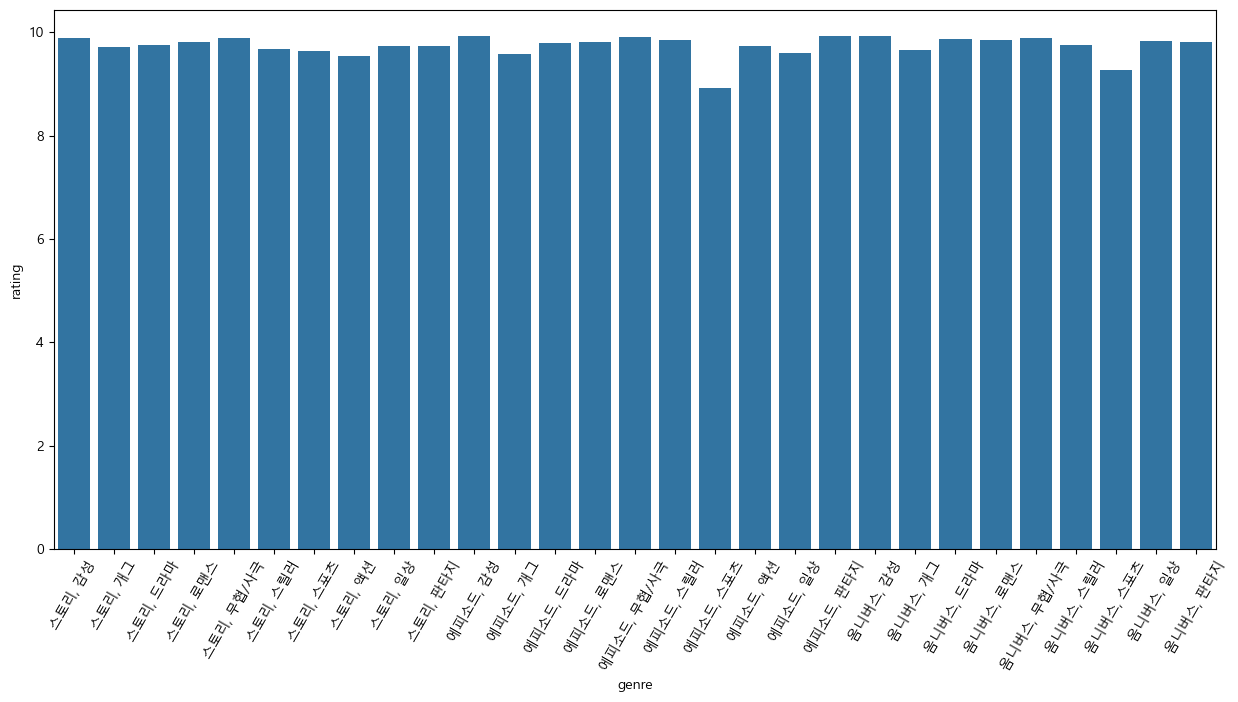

In [17]:
# 장르별 평균 시각화
plt.figure(figsize=(15, 7))
sns.barplot(x=genre_grp['genre'], y='rating', data=genre_grp)
plt.xticks(rotation=60)
plt.show()

In [18]:
# AVOVA(분산 분석)

# 장르별 평점을 리스트로 나누기
genre_groups = naver.groupby('genre')['rating'].apply(list)

anova_result = spst.f_oneway(*genre_groups)
anova_result

F_onewayResult(statistic=2.0946666137371013, pvalue=0.000688478045637517)

**분산 분석 결과, pvalue의 값이 0.05보다 작고 f통계량이 2보다 약간 크기 때문에 장르별 평점이 약간 차이가 있지만 크지 않다.**

---
## 가설3: 연령 제한(age)이 기다리면 무료 여부(free)에 영향을 줄 것이다.

### 설명: 낮은 연령층을 타겟으로 한 웹툰일수록 기다리면 무료 이벤트가 적용될 확률이 높을 것이다.
=> **관련있다**

In [19]:
naver_copy = naver.copy()

독립변수가 연령제한의 값을 임의로 채워 넣을 수 없고 데이터의 개수도 충분하니 결측치 값을 모두 제거함

In [20]:
naver_copy = naver_copy.dropna()
naver_copy.isna().sum()

id             0
title          0
author         0
genre          0
description    0
rating         0
date           0
completed      0
age            0
free           0
link           0
dtype: int64

In [21]:
naver_copy['age'].value_counts()

age
전체연령가      868
15세 이용가    578
12세 이용가    486
18세 이용가     66
Name: count, dtype: int64

In [22]:
pd.crosstab(naver_copy['age'], naver_copy['free'], normalize = 'all')

free,False,True
age,,
12세 이용가,0.147147,0.096096
15세 이용가,0.169670,0.119620
18세 이용가,0.013013,0.020020
전체연령가,0.233233,0.201201


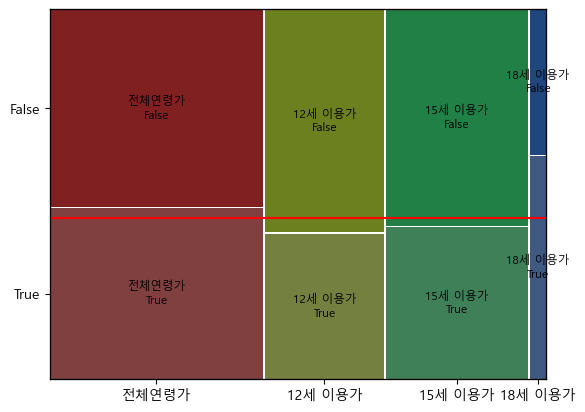

In [23]:
# age별 free여부를 mosaicplot으로 시각화
mosaic(naver_copy, ['age','free'])
plt.axhline(naver_copy['free'].mean(), color = 'r')
plt.show()

free,False,True
age,,
12세 이용가,0.604938,0.395062
15세 이용가,0.586505,0.413495
18세 이용가,0.393939,0.606061
전체연령가,0.536866,0.463134


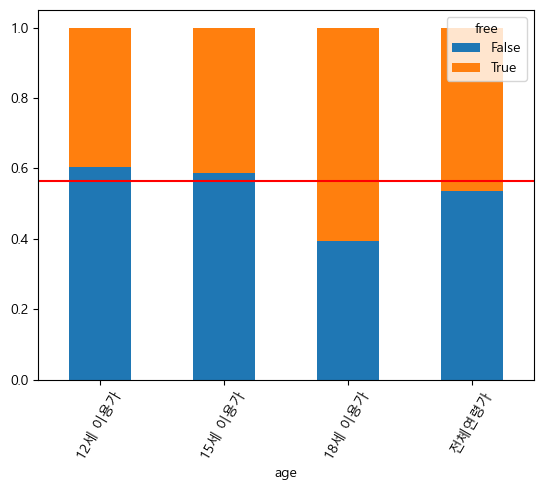

In [24]:
temp = pd.crosstab(naver_copy['age'], naver_copy['free'], normalize = 'index')
display(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-naver_copy['free'].mean(), color = 'r')
plt.xticks(rotation=60)
plt.show()

In [54]:
age_free = pd.crosstab(naver_copy['age'], naver_copy['free'], normalize='index')
spst.chi2_contingency(age_free)

Chi2ContingencyResult(statistic=0.10987833639908651, pvalue=0.9906261916781095, dof=3, expected_freq=array([[0.5305623, 0.4694377],
       [0.5305623, 0.4694377],
       [0.5305623, 0.4694377],
       [0.5305623, 0.4694377]]))

**카이제곱 검정량이 자유도의 두배보다 약간 크고 p-value의 값도 0.05보다 작기 때문에 연령제한별 무료 여부에 차이가 있지만 크지 않다고 판단된다.**

---
## naver_challenge 데이터셋 정보 확인

In [26]:
challenge = pd.read_csv('./naver_challenge.csv')

In [27]:
challenge.head()

,id,title,author,summary,rating,genre,format,description,serial,potenup,link
0,779637,예수쟁이 다이어리,ahnc****,예수쟁이의 일상,9.30,daily,에피소드,"기독교가 세상에서 제일 싫었던 사람, 어느날 예수쟁이가 되다!\r\n안티 크리스천에...",False,False,https://comic.naver.com/bestChallenge/list?tit...
1,748367,이래서 애들은,dksk****,다양한장르의 거짓말,9.89,"daily, comic",옴니버스,하숙집 꼬마를 속이는 하숙생 이야기,False,False,https://comic.naver.com/bestChallenge/list?tit...
2,748498,나의 섭식장애 일기,vldk****,섭식장애이야기,9.85,daily,에피소드,섭식장애를 겪었던 나의 이야기,False,False,https://comic.naver.com/bestChallenge/list?tit...
3,683018,오늘의 후기,chae****,매일 살아가는 후기,9.77,"daily, comic",에피소드,"여러분은 오늘 무슨 일이 있었나요? 매일을 살아가는 김챈의 그림일기, 오늘의 후기!...",False,False,https://comic.naver.com/bestChallenge/list?tit...
4,756652,제제와 함께,ls****,장애아이와 형제,9.73,"daily, drama",에피소드,출산도 육아도 처음인 초보맘에게 너무나 소중한 첫째 아들이 태어났고..둘째 딸의 출...,False,False,https://comic.naver.com/bestChallenge/list?tit...


In [28]:
challenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           3192 non-null   int64  
 1   title        3192 non-null   object 
 2   author       3192 non-null   object 
 3   summary      3191 non-null   object 
 4   rating       3192 non-null   float64
 5   genre        3192 non-null   object 
 6   format       3192 non-null   object 
 7   description  3192 non-null   object 
 8   serial       3192 non-null   bool   
 9   potenup      3192 non-null   bool   
 10  link         3192 non-null   object 
dtypes: bool(2), float64(1), int64(1), object(7)
memory usage: 230.8+ KB


In [29]:
challenge[['rating']].describe().T

,count,mean,std,min,25%,50%,75%,max
rating,3192.0,9.639395,0.387941,5.38,9.59,9.78,9.86,9.92


In [30]:
challenge.isna().sum()

id             0
title          0
author         0
summary        1
rating         0
genre          0
format         0
description    0
serial         0
potenup        0
link           0
dtype: int64

summary라서 결측치 처리 안함

,count,mean,std,min,25%,50%,75%,max
rating,3192.0,9.639395,0.387941,5.38,9.59,9.78,9.86,9.92


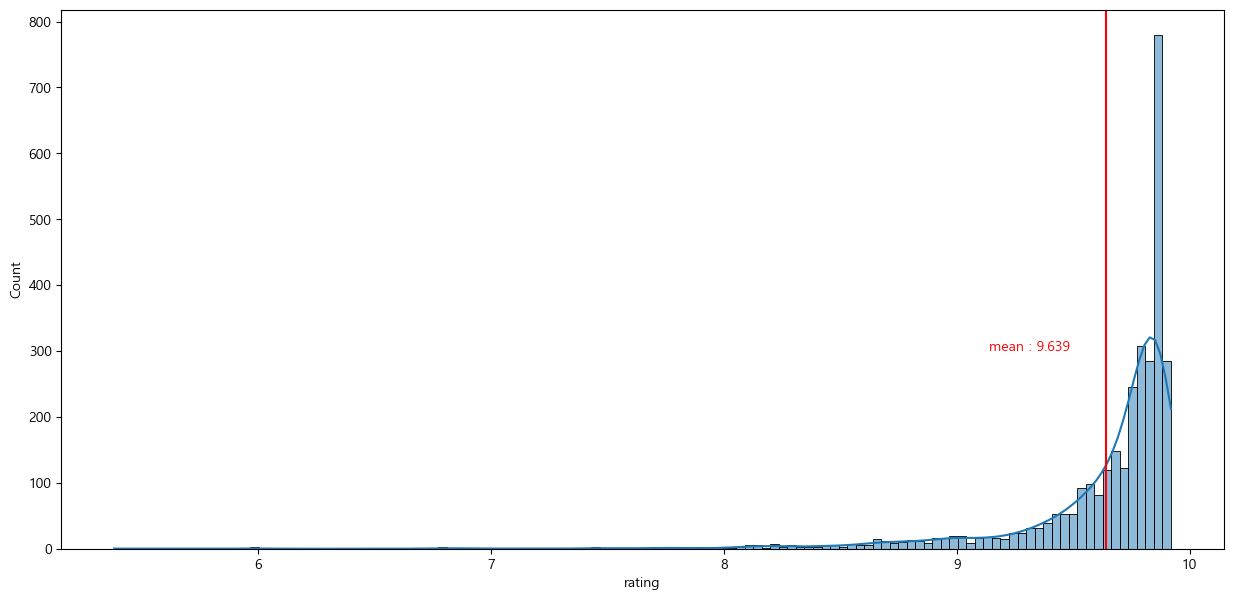

In [31]:
# raing 분포 시각화
display(challenge[['rating']].describe().T)
plt.figure(figsize=(15,7))
sns.histplot(challenge['rating'], kde=True)
plt.axvline(challenge['rating'].mean(), color='red')
plt.text(np.mean(challenge['rating'])-0.5, 300, f'mean : {round(np.mean(challenge['rating']),3)}', color = 'r')
plt.show()

In [32]:
challenge['serial'].value_counts()

serial
False    2990
True      202
Name: count, dtype: int64

---
## 가설1: 포텐업 선정 여부(potenup)가 평점(rating)에 영향을 줄 것이다.

### 설명: 포텐업에 선정된 웹툰이 선정되지 않은 웹툰에 비해 더 높은 평점을 받을 것이다.
=> 관련 없음

potenup 값의 비율차이가 너무 커서 상관관계 예측이 어려움

In [33]:
challenge['potenup'].value_counts()

potenup
False    3190
True        2
Name: count, dtype: int64

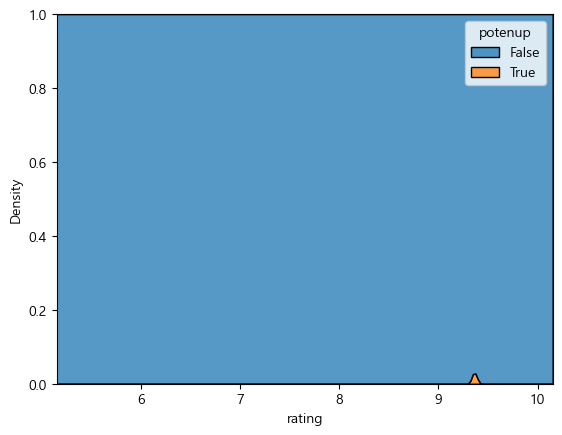

In [34]:
sns.kdeplot(x='rating', data=challenge, hue='potenup', multiple='fill')
plt.show()

In [35]:
# 두 그룹으로 데이터 저장
no_poten = challenge.loc[challenge['potenup']==False, 'rating']
poten = challenge.loc[challenge['potenup']==True, 'rating']

# t-test
spst.ttest_ind(no_poten, poten)

TtestResult(statistic=1.0006045814692723, pvalue=0.3170939070616405, df=3190.0)

**t-test결과, t통계량이 2보다 작은 1이고 p-value의 값도 0.05보다 큰 0.31이라 관련이 없다고 판단됨**

---
## 가설2: 장르(genre)가 정식 연재 여부(serial)에 영향을 줄 것이다.

### 설명: 특정 장르(예: 판타지, 드라마)가 다른 장르보다 정식 연재될 확률이 높을 것이다.
=> 관련있음

In [36]:
challenge['genre'].value_counts()

genre
daily, comic               326
fantasy, action            271
daily                      257
drama, pure                223
fantasy, drama             207
fantasy, pure              174
daily, sensibility         145
comic, fantasy             125
fantasy                    119
drama, sensibility         105
daily, drama               105
drama, thrill               88
comic, pure                 73
daily, fantasy              72
pure, sensibility           66
fantasy, thrill             65
drama                       58
comic, drama                53
daily, pure                 51
thrill                      51
pure                        48
comic                       48
fantasy, historical         42
fantasy, sensibility        42
action, thrill              40
action, drama               37
drama, sports               34
comic, sensibility          27
sensibility                 26
drama, historical           24
action                      24
comic, action               22
pu

In [37]:
# genre별 rating의 평균 확인
ch_genre_grp = challenge.groupby('genre', as_index=False)['rating'].mean()
ch_genre_grp

,genre,rating
0,action,9.445000
1,"action, drama",9.582432
2,"action, historical",9.537778
3,"action, pure",9.668000
4,"action, sensibility",9.833333
5,"action, sports",9.354444
6,"action, thrill",9.504250
7,comic,9.587083
8,"comic, action",9.516364
9,"comic, drama",9.518491


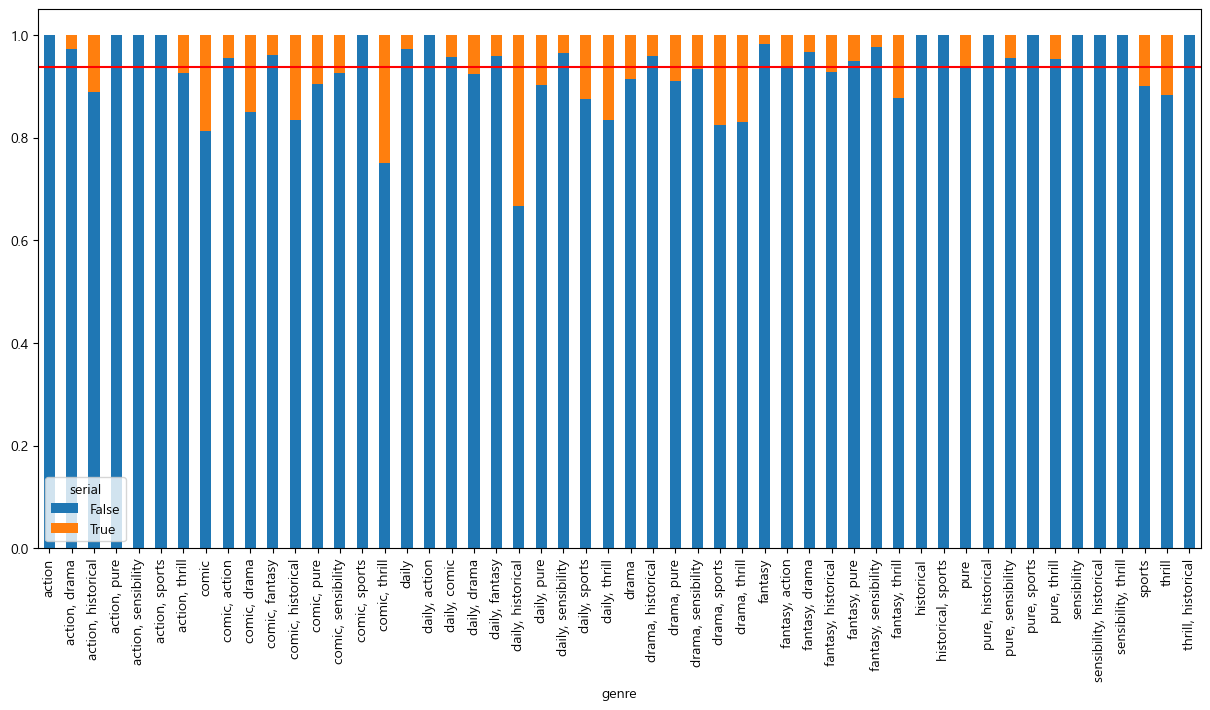

In [38]:
# genre별 serial여부를 시각화
temp = pd.crosstab(challenge['genre'], challenge['serial'], normalize='index')

fig, ax = plt.subplots(figsize=(15, 7))
temp.plot.bar(stacked=True, ax=ax)
plt.axhline(1 - challenge['serial'].mean(), color='r')
plt.xticks(rotation=90)
plt.show()

얼핏보았을때, thrill과 historical이 들어간 장르가 정식 연재가 많이 된것으로 보임

In [58]:
genre_serial = pd.crosstab(challenge['genre'], challenge['serial'], normalize=False)
spst.chi2_contingency(genre_serial)

Chi2ContingencyResult(statistic=101.01887748708923, pvalue=3.817103208409436e-05, dof=51, expected_freq=array([[2.24812030e+01, 1.51879699e+00],
       [3.46585213e+01, 2.34147870e+00],
       [8.43045113e+00, 5.69548872e-01],
       [4.68358396e+00, 3.16416040e-01],
       [2.81015038e+00, 1.89849624e-01],
       [8.43045113e+00, 5.69548872e-01],
       [3.74686717e+01, 2.53132832e+00],
       [4.49624060e+01, 3.03759398e+00],
       [2.06077694e+01, 1.39223058e+00],
       [4.96459900e+01, 3.35401003e+00],
       [1.17089599e+02, 7.91040100e+00],
       [5.62030075e+00, 3.79699248e-01],
       [6.83803258e+01, 4.61967419e+00],
       [2.52913534e+01, 1.70864662e+00],
       [5.62030075e+00, 3.79699248e-01],
       [1.12406015e+01, 7.59398496e-01],
       [2.40736216e+02, 1.62637845e+01],
       [5.62030075e+00, 3.79699248e-01],
       [3.05369674e+02, 2.06303258e+01],
       [9.83552632e+01, 6.64473684e+00],
       [6.74436090e+01, 4.55639098e+00],
       [2.81015038e+00, 1.89849624e

In [59]:
genre_serial = pd.crosstab(challenge['genre'], challenge['serial'], normalize='index')
spst.chi2_contingency(genre_serial)

Chi2ContingencyResult(statistic=4.082940561828316, pvalue=1.0, dof=51, expected_freq=array([[0.93159628, 0.06840372],
       [0.93159628, 0.06840372],
       [0.93159628, 0.06840372],
       [0.93159628, 0.06840372],
       [0.93159628, 0.06840372],
       [0.93159628, 0.06840372],
       [0.93159628, 0.06840372],
       [0.93159628, 0.06840372],
       [0.93159628, 0.06840372],
       [0.93159628, 0.06840372],
       [0.93159628, 0.06840372],
       [0.93159628, 0.06840372],
       [0.93159628, 0.06840372],
       [0.93159628, 0.06840372],
       [0.93159628, 0.06840372],
       [0.93159628, 0.06840372],
       [0.93159628, 0.06840372],
       [0.93159628, 0.06840372],
       [0.93159628, 0.06840372],
       [0.93159628, 0.06840372],
       [0.93159628, 0.06840372],
       [0.93159628, 0.06840372],
       [0.93159628, 0.06840372],
       [0.93159628, 0.06840372],
       [0.93159628, 0.06840372],
       [0.93159628, 0.06840372],
       [0.93159628, 0.06840372],
       [0.93159628, 0.06

In [61]:
genre_serial = pd.crosstab(challenge['genre'], challenge['serial'], normalize='all')
spst.chi2_contingency(genre_serial)

Chi2ContingencyResult(statistic=0.03164751800973973, pvalue=1.0, dof=51, expected_freq=array([[7.04298340e-03, 4.75813594e-04],
       [1.08579327e-02, 7.33545958e-04],
       [2.64111877e-03, 1.78430098e-04],
       [1.46728821e-03, 9.91278321e-05],
       [8.80372925e-04, 5.94766993e-05],
       [2.64111877e-03, 1.78430098e-04],
       [1.17383057e-02, 7.93022657e-04],
       [1.40859668e-02, 9.51627188e-04],
       [6.45606812e-03, 4.36162461e-04],
       [1.55532550e-02, 1.05075502e-03],
       [3.66822052e-02, 2.47819580e-03],
       [1.76074585e-03, 1.18953399e-04],
       [2.14224078e-02, 1.44726635e-03],
       [7.92335632e-03, 5.35290293e-04],
       [1.76074585e-03, 1.18953399e-04],
       [3.52149170e-03, 2.37906797e-04],
       [7.54186139e-02, 5.09517057e-03],
       [1.76074585e-03, 1.18953399e-04],
       [9.56671912e-02, 6.46313465e-03],
       [3.08130524e-02, 2.08168447e-03],
       [2.11289502e-02, 1.42744078e-03],
       [8.80372925e-04, 5.94766993e-05],
       [1.4

**카이제곱 검정 결과, p-value의 값이 0.05보다 작기 때문에 장르와 정식연재 여부과 관련이 있어 보임**

---
## 가설3: 형식(format)이 정식 연재 여부(serial)에 영향을 줄 것이다.

### 설명: 웹툰 형식(예: 단편, 장편)이 정식 연재로 이어질 가능성에 차이가 있을 것이다.
=> 관련없음

In [40]:
challenge['format'].value_counts()

format
스토리\n\n    2069
에피소드        852
옴니버스        271
Name: count, dtype: int64

In [41]:
challenge['format'] = challenge['format'].replace({'스토리\n\n':'스토리'})

In [42]:
challenge['format'].value_counts()

format
스토리     2069
에피소드     852
옴니버스     271
Name: count, dtype: int64

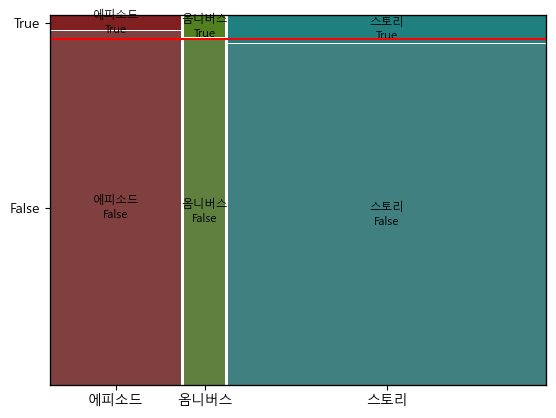

In [43]:
# format별 serial여부를 mosaicplot으로 시각화
mosaic(challenge, ['format','serial'])
plt.axhline(1-challenge['serial'].mean(), color = 'r')
plt.show()

모자이크플롯으로만 봐도 관련이 없어 보임

In [44]:
format_serial = pd.crosstab(challenge['format'], challenge['serial'])
spst.chi2_contingency(format_serial)

Chi2ContingencyResult(statistic=12.715783771637566, pvalue=0.0017330162598272686, dof=2, expected_freq=array([[1938.06704261,  130.93295739],
       [ 798.08270677,   53.91729323],
       [ 253.85025063,   17.14974937]]))

**카이제곱 결과, p-value의 값이 0.05보다 작음. 관련이 있다고함**

---
## 타겟 변수: rating (평점)가설: 베스트 도전 웹툰의 평점(naver_challenge.csv)과 정식 연재 후 평점(naver.csv)이 변화할 것이다.
### 설명: 베스트 도전에서 정식 연재로 이어진 웹툰들은 정식 연재 이후 더 높은 평점을 받을 가능성이 있을 것이다.

In [45]:
# challenge 행의 개수가 naver행의 개수 보다 크기 때문에 challenge를 베이스로 함
merge_df = pd.merge(challenge, naver, how='left', on='id')
merge_df['rating_y'].notnull().sum()

0

In [46]:
merge_df2 = pd.merge(challenge, naver, how='left', on='title')
merge_df2['rating_y']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
3187     NaN
3188     NaN
3189     NaN
3190    9.98
3191     NaN
Name: rating_y, Length: 3192, dtype: float64

In [47]:
merge_df2['rating_y'].notnull().sum()

184

title 컬럼으로 합쳐진 행의 개수 184개

In [48]:
merge_df2.columns

Index(['id_x', 'title', 'author_x', 'summary', 'rating_x', 'genre_x', 'format',
       'description_x', 'serial', 'potenup', 'link_x', 'id_y', 'author_y',
       'genre_y', 'description_y', 'rating_y', 'date', 'completed', 'age',
       'free', 'link_y'],
      dtype='object')

In [49]:
merge_df2 = merge_df2.dropna()
merge_df2 = merge_df2.reset_index(drop=True)
merge_df2 = merge_df2[['title', 'summary', 'rating_x', 'genre_x', 'format',
       'description_x', 'serial',
       'genre_y', 'description_y', 'rating_y', 'date', 'completed', 'age',
       'free']]
merge_df2

,title,summary,rating_x,genre_x,format,description_x,serial,genre_y,description_y,rating_y,date,completed,age,free
0,고고고,집사가 되어라!!!,9.89,"daily, comic",에피소드,"""너, 내 집사가 되어라!"" 어느 날 갑자기 고양이 세 마리의 간택을 받게 된 집사...",False,"스토리, 판타지","치매 걸린 할아버지, 게임 폐인 아빠와 살고 있는 고민\n원효대사가 남긴 해골물을 ...",9.97,2015.11.17 23:08,True,전체연령가,False
1,킬링타임,일상 블랙코미디,9.85,"daily, comic",에피소드,"""마지막으로 남기고 싶은 말은?""\r\n\r\n어릴 적부터 살인만을 위해 살아온 초...",False,"스토리, 스릴러","""언니, 살려줘!""3년전 죽은 동생에게서 전화가 왔다과거와 연결된 핸드폰을 이용해,...",9.93,2020.08.03 23:21,True,15세 이용가,True
2,여우자매,네이버화요웹툰,9.90,"daily, historical",옴니버스,"아주 먼 옛날, 무서운 요괴로 알려진 구미호와는 거리가 먼 꼬마 여우자매 류월,류화...",True,"에피소드, 판타지","인간을 홀리고, 간을 빼먹는 무시무시한 요괴 구미호....와는 거리가 아주 먼 꼬마...",9.95,2022.12.26 22:50,False,전체연령가,False
3,메모리얼,기억을 찾아서,9.66,"daily, thrill",스토리,[자유연재] 평소와 같이 행복한 하루를 보내고 있던 '민희'.\r\n예전부터 좋아하...,True,"스토리, 스릴러",평범한 일상을 보내고 있던 고등학생 '민희'는 예전부터 좋아하던 친구에게 고백을 계...,9.91,2022.12.27 23:00,False,15세 이용가,False
4,대학원 탈출일지,대학원에서 살아남기,9.90,daily,에피소드,잘못된 선택을 한 사람들의 이야기\r\n(자유 연재),True,"에피소드, 일상",연구에 꿈을 가지고 대학원을 선택한 병아리 요다.예상과는 다르게 연구에 관심 없는 ...,9.97,2022.12.29 22:59,False,전체연령가,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,궤짝,어두운본성을마주하다,9.71,thrill,옴니버스,마음속 낡은 궤짝을 들여다본다.\r\n충격과 공포의 옴니버스 스릴러.,False,"옴니버스, 스릴러","축축한 복도, 엉켜있는 거미줄,복도 끝 낡은 장판 밑 비밀 지하실그 곳에는 정체 모...",9.51,2022.12.26 22:51,False,15세 이용가,False
173,미신,사이비 호러스릴러,9.66,thrill,스토리,"방학을 맞이하여 할머니 집에서 지내게 된 남매, 장하준(18)과 장하나(10)\r\...",True,"스토리, 스릴러",고향에 돌아와 할머니와 살게 된 '하준'과 '하나'그런 아이들을 기다리고 있는 건 ...,9.42,2022.09.26 23:00,True,15세 이용가,False
174,악인,현대판타지 스릴러,9.77,thrill,스토리,다른사람의 생각을 읽는 능력. 그 능력으로 살인마를 마주했을 때.,True,"스토리, 스릴러",타인의 생각을 눈으로 볼 수 있는 주인공 봉강.자신의 능력을 이용해서 소소한 일상을...,9.75,2021.12.06 22:55,True,15세 이용가,True
175,새벽9시,"어둠 속에 멈춰버린 시간, 새벽 9시. 오지마을 오왕리의 비밀이 드러난다.",9.79,thrill,스토리,산과 강으로 사방이 둘러싸인 오지마을 오왕리.\n원인 모를 기이한 현상들이 일어나며...,True,"스토리, 스릴러",어둠이 멈춰버린 시간 새벽 9시.오지마을 '오왕리'가 감추고 있던 비밀이 드러난다.,9.70,2013.07.26 23:22,True,15세 이용가,False


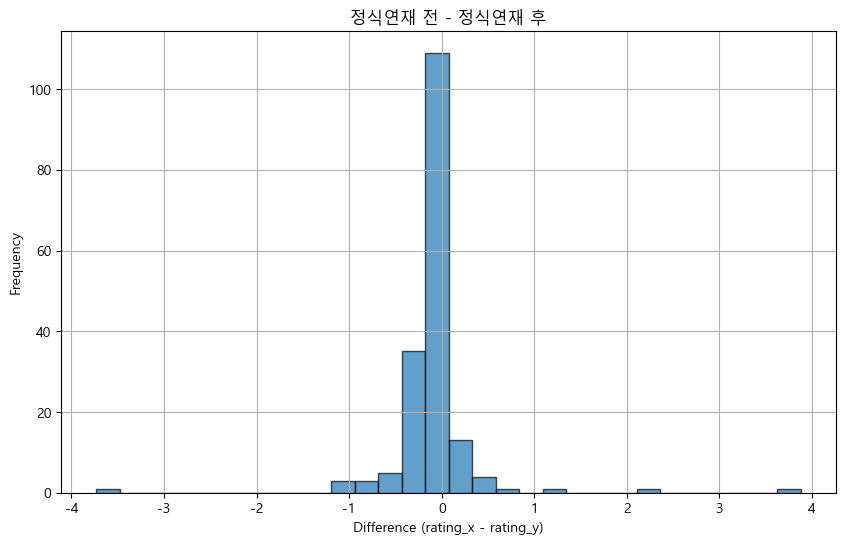

In [50]:
# 두 rating의 차이를 계산
merge_df2['rating_diff'] = merge_df2['rating_x'] - merge_df2['rating_y']

# 히스토그램으로 차이 시각화
plt.figure(figsize=(10, 6))
plt.hist(merge_df2['rating_diff'], bins=30, edgecolor='black', alpha=0.7)
plt.title('정식연재 전 - 정식연재 후')
plt.xlabel('Difference (rating_x - rating_y)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

음수일 경우가 정식 연재 후 평점이 오른것이다.

그래프로 보았을 경우 음수인 경우가 많아 보인다.

In [51]:
merge_df2['rating_up'] = [1 if diff < 0 else 0 for diff in merge_df2['rating_diff']]

In [52]:
rating_up_counts = merge_df2['rating_up'].value_counts()
rating_up_counts

rating_up
1    144
0     33
Name: count, dtype: int64

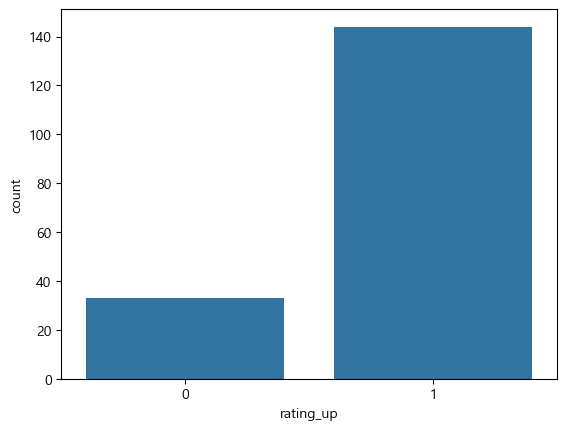

In [53]:
sns.barplot(rating_up_counts)
plt.show()

정식 연재 후 평점 상승한 웹툰이 많음을 볼 수 있다.